# One Layer Neural Network in Python

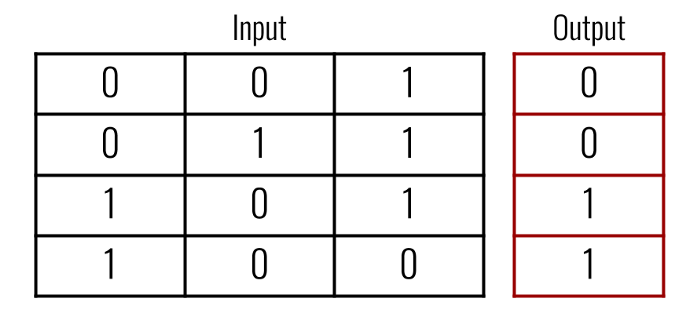

#### Packages Required

In [96]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

#### Input Data for training NN

In [97]:
#3 features and 4 observations
x = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

#### Output Data for training NN

In [98]:
y = np.array([[0], [0], [0], [1], [1], [1]])

#### Define Neural Network

In [99]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        #self.weights   = np.random.rand(self.input.shape[1],1)   
        self.weights = np.array([[0.5],[0.5],[0.5]])
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.error_history = []
        self.iteration_list = []
    
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedforward(self):
        self.output = self.sigmoid(np.dot(self.input, self.weights))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights
        d_weights = np.dot(self.input.T, (self.y - self.output) * self.sigmoid(self.output,deriv=True))
        
        # update the weights with the derivative (slope) of the loss function
        self.weights += d_weights
    
    def train(self, iterations=1500):
        for iteration in range(iterations):
            # flow forward and produce an output
            self.feedforward()
            # go back though the network to make corrections based on the output
            self.backprop()  
            self.error  = self.output - self.y
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.iteration_list.append(iteration)
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

#### Train Neural Network

In [100]:
NN = NeuralNetwork(x, y)
NN.train()

#### Create two samples for prediction

In [101]:
Sample_1 = np.array([[1, 1, 0]]) #Output 1
Sample_2 = np.array([[0, 1, 1]]) #Output 0

#### Predict output for two samples

In [102]:
print(NN.predict(example))
print(NN.predict(example_2))

[[0.9617923]]
[[0.02699935]]


#### Error plot over the entire training duration

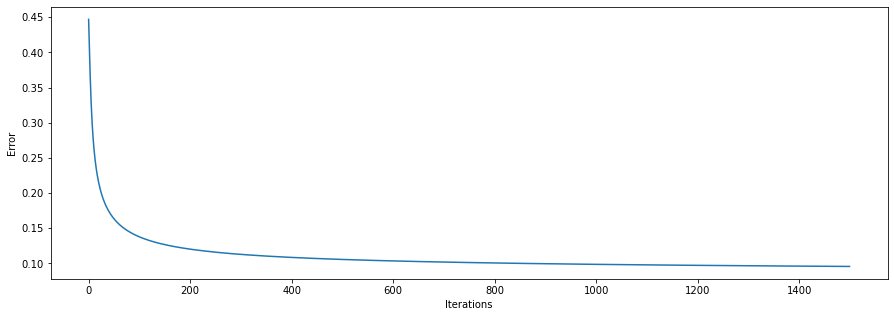

In [103]:
plt.figure(figsize=(15,5))
plt.plot(NN.iteration_list, NN.error_history)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()